In [1]:
%load_ext autoreload
%autoreload 2

from keras.layers import merge
from src.models.data import *
from src.models.model import *
#import rasterio.plot as rioplot
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import rasterio
%matplotlib inline

import hh_utilities as hu

Using TensorFlow backend.


In [2]:
sess = tf.InteractiveSession()


In [3]:
model = unet()

/media/hh/hd_internal/hh/DSR_Berlin_2018/roaddetection/src/models/model.py:60: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input=inputs, output=conv10)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 4)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 512, 512, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 256, 256, 64) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [4]:
model.load_weights("../../models/models_unet_membrane_analytic_27_08_14_55.hdf5")

In [5]:
y_true = io.imread("../../data/train/map/20180419_074323_0c43_3B_0032.tif", as_gray=False)
y_true = y_true.ravel()//255

In [6]:
# branch off rgb
img = io.imread("../../data/train/sat/20180419_074323_0c43_3B_0032.tif", as_gray=False)
# branch off rgb
img_rgb = img[:, :, 0:3]
# scale, reshape
img = img/255
img = np.reshape(img, (1,) + img.shape)

In [7]:
p = model.predict(img).reshape(512, 512)
hu.varinfo(p)

<class 'numpy.ndarray'> of size (512, 512) of type float32
can be indexed with scalar
iterable


In [87]:
testGene = testGenerator("../../data/train/sat", num_image=10,target_size=(512,512),as_gray=False)

In [ ]:
# for img in testGene:
#     print(img.shape)
results = model.predict_generator(testGene, steps=10)
#model.evaluate_generator(results, steps=10, verbose=1)

In [90]:
model.evaluate(img,p)

ValueError: Error when checking target: expected conv2d_72 to have 4 dimensions, but got array with shape (512, 512)

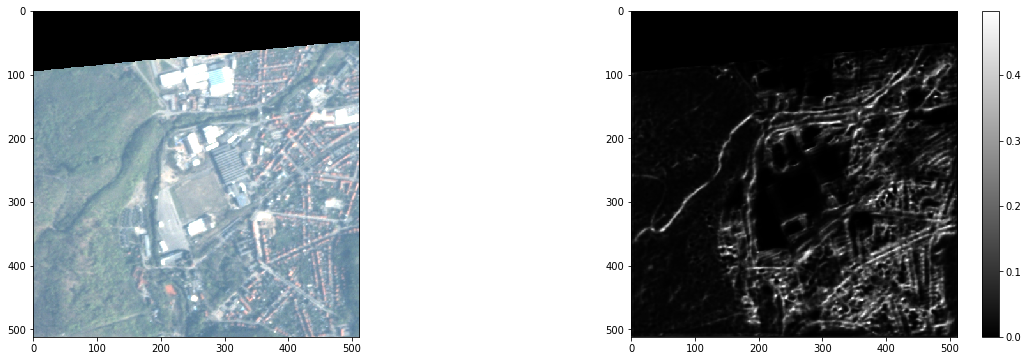

In [67]:
figH1 = plt.figure(1, figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb[:,:,::-1])
plt.subplot(1, 2, 2)
plt.imshow(p, cmap='gray')
plt.colorbar()

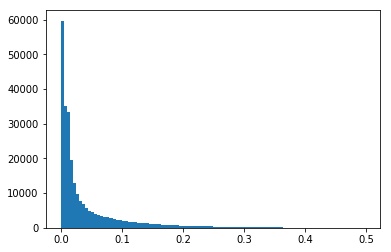

In [68]:
figH1 = plt.figure(1)   
plt.hist(p.ravel(), 100);

In [69]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, p.ravel())

0.5126909383856676